<a href="https://colab.research.google.com/github/Hyerinrin/AI-Lesson/blob/main/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A510%EC%A3%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.optimizers import Adam

#데이터 읽고 신경망에 입력할 형태로 변환
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

#LeNet-5신경망 모델 설계
cnn=Sequential()
cnn.add(Conv2D(6,(5,5),padding='same',activation='relu',input_shape=(28,28,1)))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(16,(5,5),padding='same',activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(120,(5,5),padding='same',activation='relu'))
cnn.add(Flatten())#한 줄로 세우기
cnn.add(Dense(84,activation='relu'))
cnn.add(Dense(10,activation='softmax'))

#신경망 모델학습
cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
hist=cnn.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

#정확률
res=cnn.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

Epoch 1/30
469/469 - 46s - loss: 0.2049 - accuracy: 0.9376 - val_loss: 0.0505 - val_accuracy: 0.9834 - 46s/epoch - 97ms/step
Epoch 2/30
469/469 - 45s - loss: 0.0537 - accuracy: 0.9830 - val_loss: 0.0360 - val_accuracy: 0.9873 - 45s/epoch - 96ms/step
Epoch 3/30
469/469 - 45s - loss: 0.0370 - accuracy: 0.9883 - val_loss: 0.0311 - val_accuracy: 0.9892 - 45s/epoch - 97ms/step
Epoch 4/30
469/469 - 46s - loss: 0.0286 - accuracy: 0.9911 - val_loss: 0.0334 - val_accuracy: 0.9889 - 46s/epoch - 97ms/step
Epoch 5/30
469/469 - 46s - loss: 0.0233 - accuracy: 0.9928 - val_loss: 0.0293 - val_accuracy: 0.9908 - 46s/epoch - 98ms/step
Epoch 6/30
469/469 - 50s - loss: 0.0186 - accuracy: 0.9938 - val_loss: 0.0341 - val_accuracy: 0.9895 - 50s/epoch - 106ms/step
Epoch 7/30
469/469 - 67s - loss: 0.0149 - accuracy: 0.9950 - val_loss: 0.0323 - val_accuracy: 0.9900 - 67s/epoch - 142ms/step
Epoch 8/30
469/469 - 53s - loss: 0.0126 - accuracy: 0.9961 - val_loss: 0.0370 - val_accuracy: 0.9895 - 53s/epoch - 112ms/st

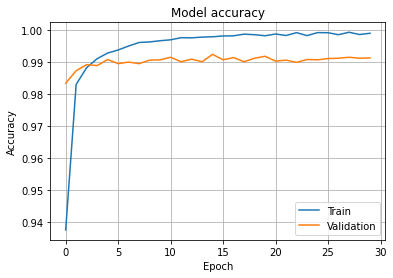

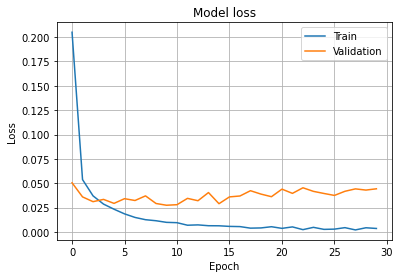

In [ ]:
import matplotlib.pyplot as plt

#정확률
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()
#손실함수
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()

Epoch 1/12
469/469 - 134s - loss: 0.2791 - accuracy: 0.9143 - val_loss: 0.0532 - val_accuracy: 0.9833 - 134s/epoch - 286ms/step
Epoch 2/12
469/469 - 131s - loss: 0.0995 - accuracy: 0.9709 - val_loss: 0.0434 - val_accuracy: 0.9856 - 131s/epoch - 279ms/step
Epoch 3/12
469/469 - 130s - loss: 0.0750 - accuracy: 0.9777 - val_loss: 0.0425 - val_accuracy: 0.9869 - 130s/epoch - 277ms/step
Epoch 4/12
469/469 - 130s - loss: 0.0628 - accuracy: 0.9815 - val_loss: 0.0297 - val_accuracy: 0.9897 - 130s/epoch - 276ms/step
Epoch 5/12
469/469 - 130s - loss: 0.0563 - accuracy: 0.9829 - val_loss: 0.0294 - val_accuracy: 0.9894 - 130s/epoch - 278ms/step
Epoch 6/12
469/469 - 133s - loss: 0.0478 - accuracy: 0.9850 - val_loss: 0.0307 - val_accuracy: 0.9894 - 133s/epoch - 285ms/step
Epoch 7/12
469/469 - 137s - loss: 0.0427 - accuracy: 0.9868 - val_loss: 0.0292 - val_accuracy: 0.9900 - 137s/epoch - 292ms/step
Epoch 8/12
469/469 - 159s - loss: 0.0390 - accuracy: 0.9874 - val_loss: 0.0314 - val_accuracy: 0.9897 - 

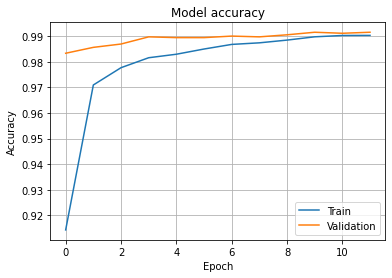

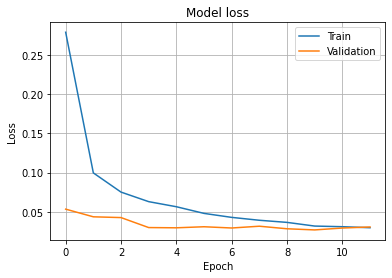

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

#데이터 읽고 신경망에 입력할 형태로 변환
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

#c-c-p-fc-fc구조 신경망 모델 설계
cnn=Sequential()
cnn.add(Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(28,28,1)))
cnn.add(Conv2D(64,(3,3),padding='same',activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))#25%를 버리고 학습해라..
cnn.add(Flatten())#한 줄로 세우기(다차원->1차원으로)
cnn.add(Dense(84,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10,activation='softmax'))

#신경망 모델학습
cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
hist=cnn.fit(x_train,y_train,batch_size=128,epochs=12,validation_data=(x_test,y_test),verbose=2)

#정확률
res=cnn.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

#정확률
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()
#손실함수
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()

Epoch 1/30
391/391 - 8s - loss: 1.6407 - accuracy: 0.3944 - val_loss: 1.3140 - val_accuracy: 0.5232 - 8s/epoch - 21ms/step
Epoch 2/30
391/391 - 7s - loss: 1.2682 - accuracy: 0.5478 - val_loss: 1.1157 - val_accuracy: 0.6114 - 7s/epoch - 19ms/step
Epoch 3/30
391/391 - 7s - loss: 1.1029 - accuracy: 0.6101 - val_loss: 0.9721 - val_accuracy: 0.6578 - 7s/epoch - 19ms/step
Epoch 4/30
391/391 - 7s - loss: 0.9791 - accuracy: 0.6566 - val_loss: 0.8752 - val_accuracy: 0.6910 - 7s/epoch - 18ms/step
Epoch 5/30
391/391 - 7s - loss: 0.9001 - accuracy: 0.6840 - val_loss: 0.8146 - val_accuracy: 0.7181 - 7s/epoch - 19ms/step
Epoch 6/30
391/391 - 7s - loss: 0.8411 - accuracy: 0.7063 - val_loss: 0.7659 - val_accuracy: 0.7369 - 7s/epoch - 19ms/step
Epoch 7/30
391/391 - 7s - loss: 0.7945 - accuracy: 0.7225 - val_loss: 0.7203 - val_accuracy: 0.7488 - 7s/epoch - 18ms/step
Epoch 8/30
391/391 - 7s - loss: 0.7516 - accuracy: 0.7379 - val_loss: 0.7262 - val_accuracy: 0.7479 - 7s/epoch - 19ms/step
Epoch 9/30
391/3

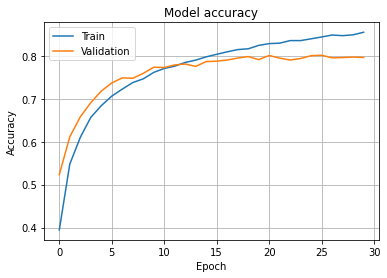

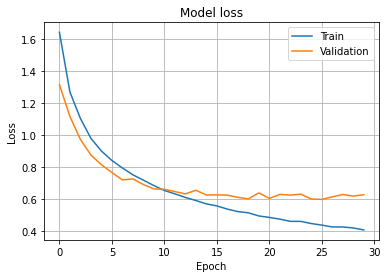

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

#신경망 모델 설계
cnn=Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
cnn.add(Conv2D(32,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(64,(3,3),activation='relu',input_shape=(32,32,3)))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(512,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10,activation='softmax'))

#신경망 모델학습
cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
hist=cnn.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

#정확률
res=cnn.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

#정확률
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()
#손실함수
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()
cnn.save("my_cnn.h5")